
# Project: TMDB Movies Dataset Invistigation 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

TMBD is a dataset for movies, it contains data about movies names, directors, popularity, budget and revenue. This invistigation is going through this data to find relations and clearify it. Like, does the budget of the film affects its popularity? or are the films that have more people voted on, have much popularity? or does the popularity of the film increasing dependant on how modern it is? Which month we expect more popularity for film released in? We will walk through some steps to clearify these relations.  

In [74]:
#importing important libraries: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
At this step, I checked the data set and deleted all the columns that I will no longer need in the investigation. And checked the new dataframe for any missing date. After that I created new columns to do specific tasks in the investigation.  

In [75]:
#Loading data and having the first look. 
df=pd.read_csv('tmdb-movies.csv')
df.head()
#We will notice some features that are very specific to the film itself and can't make a relation. 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [76]:
df.shape

(10866, 21)

In [77]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [78]:
df.info()
#We will notice some missing values needs to be handeled if we are to use these columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning (dropping non-important columns and dealing with null values in rows)

In [79]:
#We will drop all the colomns that are specific to the movie itself. 
df.drop(['id','imdb_id','original_title','cast','homepage','director','tagline','keywords','overview','production_companies','runtime','genres','revenue','budget_adj','revenue_adj'], axis=1,inplace=True)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 6 columns):
popularity      10866 non-null float64
budget          10866 non-null int64
release_date    10866 non-null object
vote_count      10866 non-null int64
vote_average    10866 non-null float64
release_year    10866 non-null int64
dtypes: float64(2), int64(3), object(1)
memory usage: 509.4+ KB


In [81]:
df.head()

,popularity,budget,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,6/9/15,5562,6.5,2015
1,28.419936,150000000,5/13/15,6185,7.1,2015
2,13.112507,110000000,3/18/15,2480,6.3,2015
3,11.173104,200000000,12/15/15,5292,7.5,2015
4,9.335014,190000000,4/1/15,2947,7.3,2015


In [82]:
df.describe()

,popularity,budget,vote_count,vote_average,release_year
count,10866.000000,1.086600e+04,10866.000000,10866.000000,10866.000000
mean,0.646441,1.462570e+07,217.389748,5.974922,2001.322658
std,1.000185,3.091321e+07,575.619058,0.935142,12.812941
min,0.000065,0.000000e+00,10.000000,1.500000,1960.000000
25%,0.207583,0.000000e+00,17.000000,5.400000,1995.000000
50%,0.383856,0.000000e+00,38.000000,6.000000,2006.000000
75%,0.713817,1.500000e+07,145.750000,6.600000,2011.000000
max,32.985763,4.250000e+08,9767.000000,9.200000,2015.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BA99856080>,
      dtype=object)

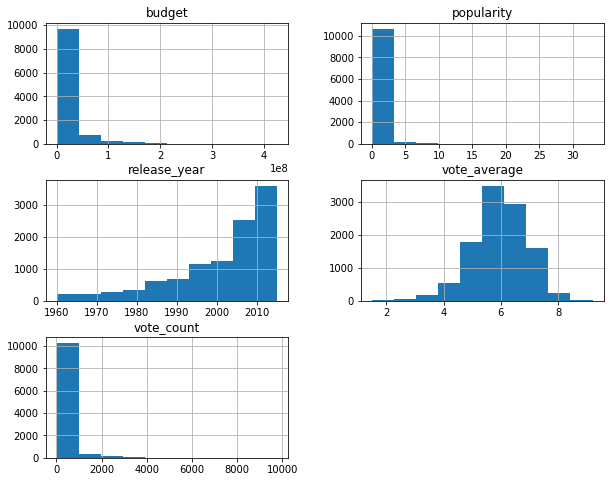

In [83]:
df.hist(figsize=(10,8))

In the past section,
.I have dropped some columns from the dataset that we will not use in the invistegation.
.I didn't find any missing values so rows remains. 
In the next Section,
.I will do masking and create new columns extracted from the original dataset just to make the 
.I will fix the budget columns from the zero values by using its mean
.Visualization looks better and easied. 


<a id='eda'></a>
## Exploratory Data Analysis
Now we are about finding relations with popularity and (budget, vote counts, release year and release month) 
### Research Question 1 (Does film budget affects popularity? )

In [84]:
#masking popularity using mean value 
popular=df.popularity>=0.647456
popular.head()

0    True
1    True
2    True
3    True
4    True
Name: popularity, dtype: bool

In [85]:
unpopular=df.popularity <0.647456
unpopular.head()

0    False
1    False
2    False
3    False
4    False
Name: popularity, dtype: bool

In [86]:
#Fixing zero values in budget series.
budget_mean=df.budget.mean()
df['budget']=df['budget'].replace(0,budget_mean)

In [87]:
#Checking if the comlumns have a corelation. 
df.budget[popular].mean()


40665173.454875246

In [88]:
df.budget[unpopular].mean()

15103468.814745331

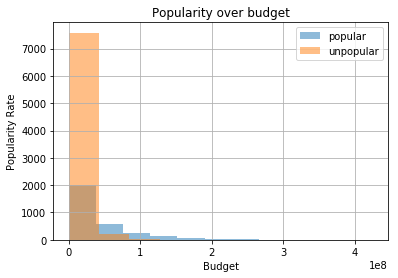

In [89]:
#Visualising the corelation between popularity and budget
df.budget[popular].hist(alpha=0.5,bins=10,label='popular')
df.budget[unpopular].hist(alpha=0.5,bins=10,label='unpopular')
#Making the visualization more readily interpreted.
plt.title('Popularity over budget')
plt.xlabel('Budget')
plt.ylabel('Popularity Rate')
plt.legend();

About Budget, I have chosen histogram to show the date skew and diversity that can clearify correlation.

We can firstly see that the plot is skewed into right, that's mean the mean is  greater than the median. which gives more information about the intensity of the data at first points.

Now we can notice a strong correlation between the budget of the film and its popularity. 
So from the visualization we can say that it's very possible that budget has a strong effect on film's popularity.

### Research Question 2  (Do vote counts affect popularity?)

In [90]:
#Checking if the comlumns have a corelation. 
df.vote_count[popular].mean()


649.690445026178

In [91]:
df.vote_count[unpopular].mean()

48.233418693982074

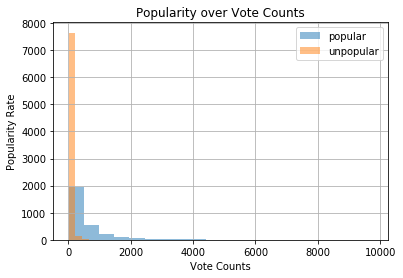

In [92]:
#Visualising the corelation between popularity and vote_counts
df.vote_count[popular].hist(alpha=0.5,bins=20,label='popular')
df.vote_count[unpopular].hist(alpha=0.5,bins=20,label='unpopular')
#Making the visualization more readily interpreted.
plt.title('Popularity over Vote Counts')
plt.xlabel('Vote Counts')
plt.ylabel('Popularity Rate')
plt.legend();

About voting counts, I have chosen histogram to show the date skew and diversity that can clearify correlation.

We can firstly see that the plot is skewed into right, that's mean the mean is  greater than the median. which gives more information about the intensity of the data at first points 

Generally we can notice a correlation between how many people voted on the film and its popularity.
So we can say that it's possible for the film to became more popular if more people have rated it. 

### Research Question 3  (Is popularity of the movies increasing by time? )

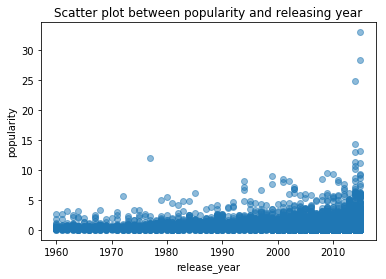

In [93]:
#Visualising the corelation between popularity and releasing year
plt.scatter(df['release_year'],df['popularity'],alpha=0.5)
plt.title('Scatter plot between popularity and releasing year')
plt.xlabel('release_year')
plt.ylabel('popularity')
plt.show()

#Now we can notice that through years, popularity of the movies increases, 
#except for the outliers specially between (1970-1980) we can find some movies that have a good popularity. 

About release year I prefered to use scatter plot to clearify the increasing popularity over years. 

In this visualization we had 10866 sample to study. Over years we can notie that 60's movies had the smallest share among films in our dataset when we talk about popularity. Comparing to 2000's movies. We can aslo notice the giants leaps happend in 70's in popularity which makes an observed outliers.

Genrerally we can notice that through years, popularity of the movies increases, except for the outliers specially between (1970-1980) we can find some movies that have a good popularity. 

### Research Question 4  (Which month\s have higher popularity? )

In [94]:
#Extracting the month of release from release_date column.
date=df['release_date']
#Avoiding crashing into null values by using date_to_month function
def date_to_month(date):
    if date.any() == '':
        return None
    else:
         df['release_month']=date.str.slice(start=0,stop=1)
            #Slicing the string so that we can get the month of release 


In [95]:
#Calling the function and checking the output
date_to_month(date)
df['release_month'].head()

0    6
1    5
2    3
3    1
4    4
Name: release_month, dtype: object

In [96]:
#Checking if there is any null values needs to be dropped.  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 7 columns):
popularity       10866 non-null float64
budget           10866 non-null float64
release_date     10866 non-null object
vote_count       10866 non-null int64
vote_average     10866 non-null float64
release_year     10866 non-null int64
release_month    10866 non-null object
dtypes: float64(3), int64(2), object(2)
memory usage: 594.3+ KB


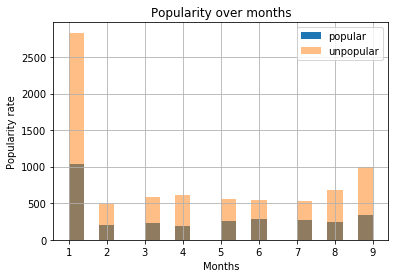

In [97]:
#Visulaizing the histgram so that we can notice what months has better popularity. 
df.release_month[popular].hist(alpha=1,bins=20,label='popular')
df.release_month[unpopular].hist(alpha=0.5,bins=20,label='unpopular')
#Making the visualization more readily interpreted.
plt.title('Popularity over months')
plt.xlabel('Months')
plt.ylabel('Popularity rate')
plt.legend();

In the relation between months and popularity of movies, we have used histogram to be more describtive about the data. We can find that we had about 10866 movie, most of them are focused in january. Also we can see an observed popularity in june and september films, against a small ration in Feb, March and April.

So we can notice that movies released in cristmas nights 'january month' has a better popularity.

<a id='conclusions'></a>
## Conclusions

After visualizing the data we can notice that there is a strong corelation between budget of the film and its popularity, it seems like people are likely to watch the film or talk about it dependant on its budget. It also seems that there is a corelation between how many people voted on the film and its popularity. And we can also notice notice that the popularity of the movies is increasing by years. Finally we can notice that films released in january are more to be popular. 

## Limitations

About the dataset, I have dropped some columns that are specific to the film itself, like film ID and date of release. And columns that I couldn't find a correlation between it and popularity. I also fixed some columns like budget from zero values by using its mean value. The investigation is arround finding a correlation between popularity and budget, vote_counts, year of release and month of release.  